# Lab6

## In class

C:\Users\marci\AppData\Local\Temp\ipykernel_28352\4257100373.py:46: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier=KerasClassifier(build_model)


Epoch 1/13
3/3 [==============================] - 1s 6ms/step - loss: 0.9229 - accuracy: 0.2917
Epoch 2/13
3/3 [==============================] - 0s 5ms/step - loss: 0.8568 - accuracy: 0.5729
Epoch 3/13
3/3 [==============================] - 0s 5ms/step - loss: 0.8004 - accuracy: 0.7812
Epoch 4/13
3/3 [==============================] - 0s 6ms/step - loss: 0.7636 - accuracy: 0.8125
Epoch 5/13
3/3 [==============================] - 0s 6ms/step - loss: 0.7394 - accuracy: 0.7812
Epoch 6/13
3/3 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.7812
Epoch 7/13
3/3 [==============================] - 0s 5ms/step - loss: 0.6737 - accuracy: 0.7917
Epoch 8/13
3/3 [==============================] - 0s 5ms/step - loss: 0.6385 - accuracy: 0.7812
Epoch 9/13
3/3 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.8021
Epoch 10/13
3/3 [==============================] - 0s 5ms/step - loss: 0.5957 - accuracy: 0.8021
Epoch 11/13
3/3 [======================

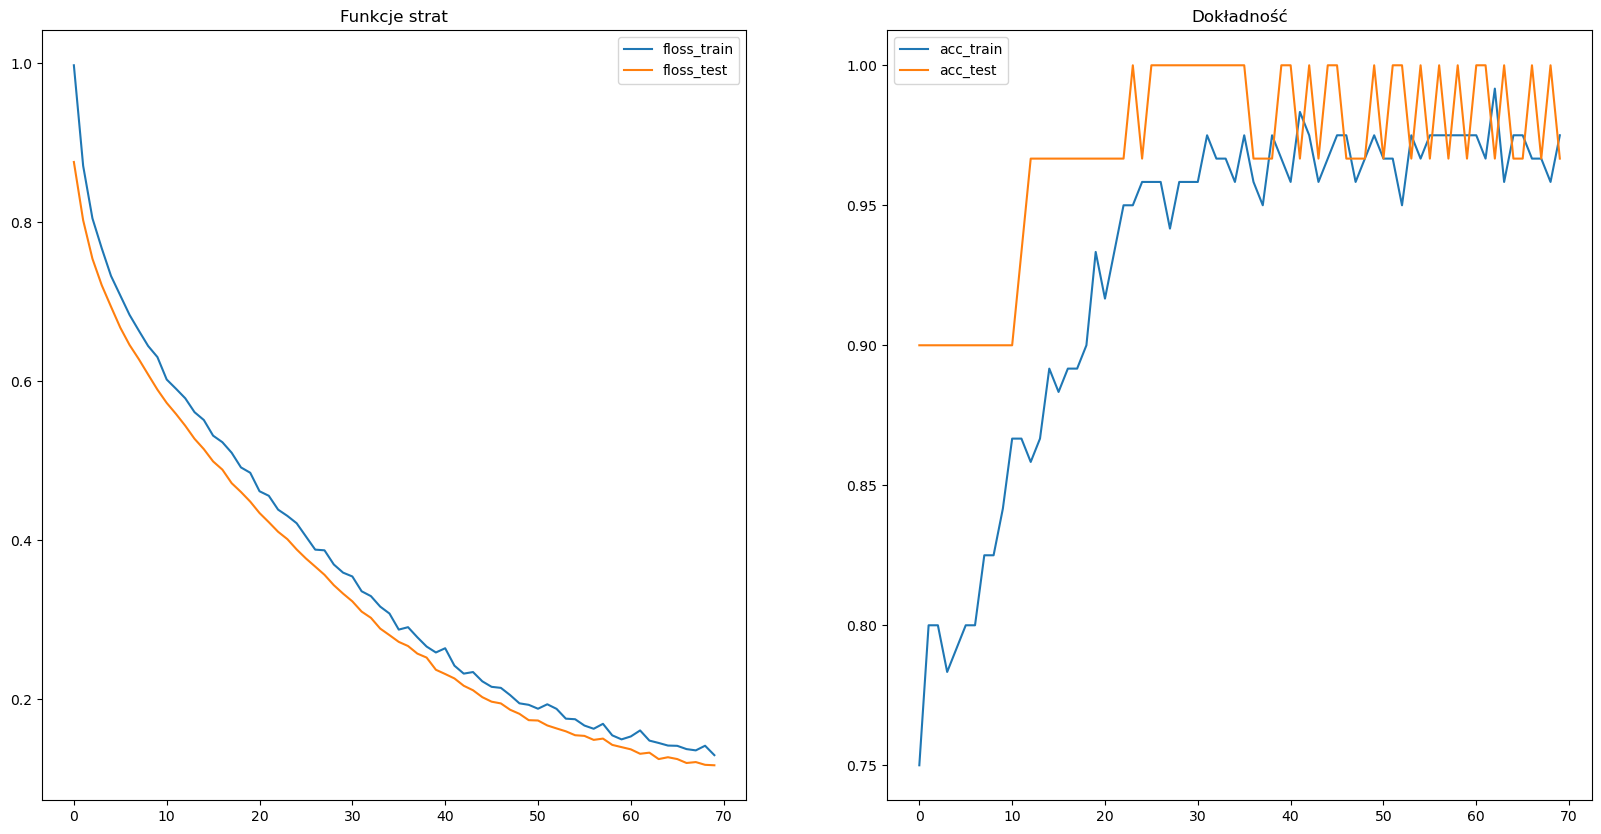

: 

In [1]:
#%% DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
data = load_iris()
y = data.target
X = data.data
y = pd.Categorical(y)
y = pd.get_dummies(y).values
class_num = y.shape[1]

#%%MODELS IMPORTS
from keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import reciprocal
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, GaussianNoise
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import plot_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from keras.regularizers import l2, l1

#%%DATA SPLIT AND MANIPULATION
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#%%BUILDING NEURAL NETWORK
num_epochs_for_search=13
num_epochs_for_final_training = 70
def build_model( n_neurons, noise, optimizer):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape = (X.shape[1],), activation = 'tanh', name='Input'))
    
    model.add(Dense(n_neurons,activation = 'tanh',kernel_regularizer = l1(0.001),name='First'))
    model.add(GaussianNoise(noise,name='Second'))
    model.add(Dense(n_neurons,activation = 'tanh',name='Third'))
    model.add(Dense(class_num,activation='softmax'))
        
    model.compile(optimizer=optimizer(0.001), loss='binary_crossentropy', metrics=('accuracy'))
    return model    
#%%RANDOMIZED SEARCH -looking for best parameters
keras_classifier=KerasClassifier(build_model)
param_distribs={
    'n_neurons': [40,60],
    'noise': [0.12,0.31],
    'optimizer': [Adam,RMSprop]
    }
grid_search_cv=GridSearchCV(keras_classifier, param_distribs)
grid_search_cv.fit(X_train, y_train, epochs=num_epochs_for_search)

best_params=grid_search_cv.best_params_ 
#best_model_from_random=rnd_search_cv.best_estimator_ 

print("Najlepsze parametry: ",best_params)

choice = input("Kontynować? [y/N]")

if(choice != "y" or choice != "Y"):
    exit(0)

#%% CREATION OF BEST NETWORK - based on parameters search
best_model = build_model(**best_params)

best_model.fit(X_train,y_train,batch_size=32,epochs=num_epochs_for_final_training,validation_data=(X_test,y_test),verbose=2)

#%% CHARTS OF MODEL TRAINING HISTORY
history = best_model.history.history
floss_train = history['loss']
floss_test = history['val_loss']
acc_train = history['accuracy']
acc_test = history['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))

epochs = np.arange(0, num_epochs_for_final_training)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokładność')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

## Report

C:\Users\marci\AppData\Local\Temp\ipykernel_27964\2053943855.py:9: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('practice_lab_3.csv',";")
C:\Users\marci\AppData\Local\Temp\ipykernel_27964\2053943855.py:74: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier=KerasClassifier(build_model)


Epoch 1/30
13/13 [==============================] - 1s 3ms/step - loss: 0.7094 - accuracy: 0.7117
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 0.7674 - accuracy: 0.7066
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6371 - accuracy: 0.6939
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5755 - accuracy: 0.7449
Epoch 5/30
13/13 [==============================] - 0s 4ms/step - loss: 0.5041 - accuracy: 0.7577
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7755
Epoch 7/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7806
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7857
Epoch 9/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8061
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.7985
Epoch 11/30
13/13 [

C:\Users\marci\AppData\Local\Temp\ipykernel_27964\2053943855.py:133: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier=KerasClassifier(build_model)


13/13 [==============================] - 1s 2ms/step - loss: 1.1278 - accuracy: 0.6684
Epoch 2/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.7015
Epoch 3/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6545 - accuracy: 0.6939
Epoch 4/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.7219
Epoch 5/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5387 - accuracy: 0.7398
Epoch 6/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5286 - accuracy: 0.7474
Epoch 7/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5719 - accuracy: 0.7832
Epoch 8/30
13/13 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.7730
Epoch 9/30
13/13 [==============================] - 0s 3ms/step - loss: 0.5910 - accuracy: 0.7577
Epoch 10/30
13/13 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.7857
Epoch 11/30
13/13 [===========

C:\Users\marci\AppData\Local\Temp\ipykernel_27964\2053943855.py:228: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 layer_normalization_1 (Laye  (None, 64)               128       
 rNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 64)               0         
 oise)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)              

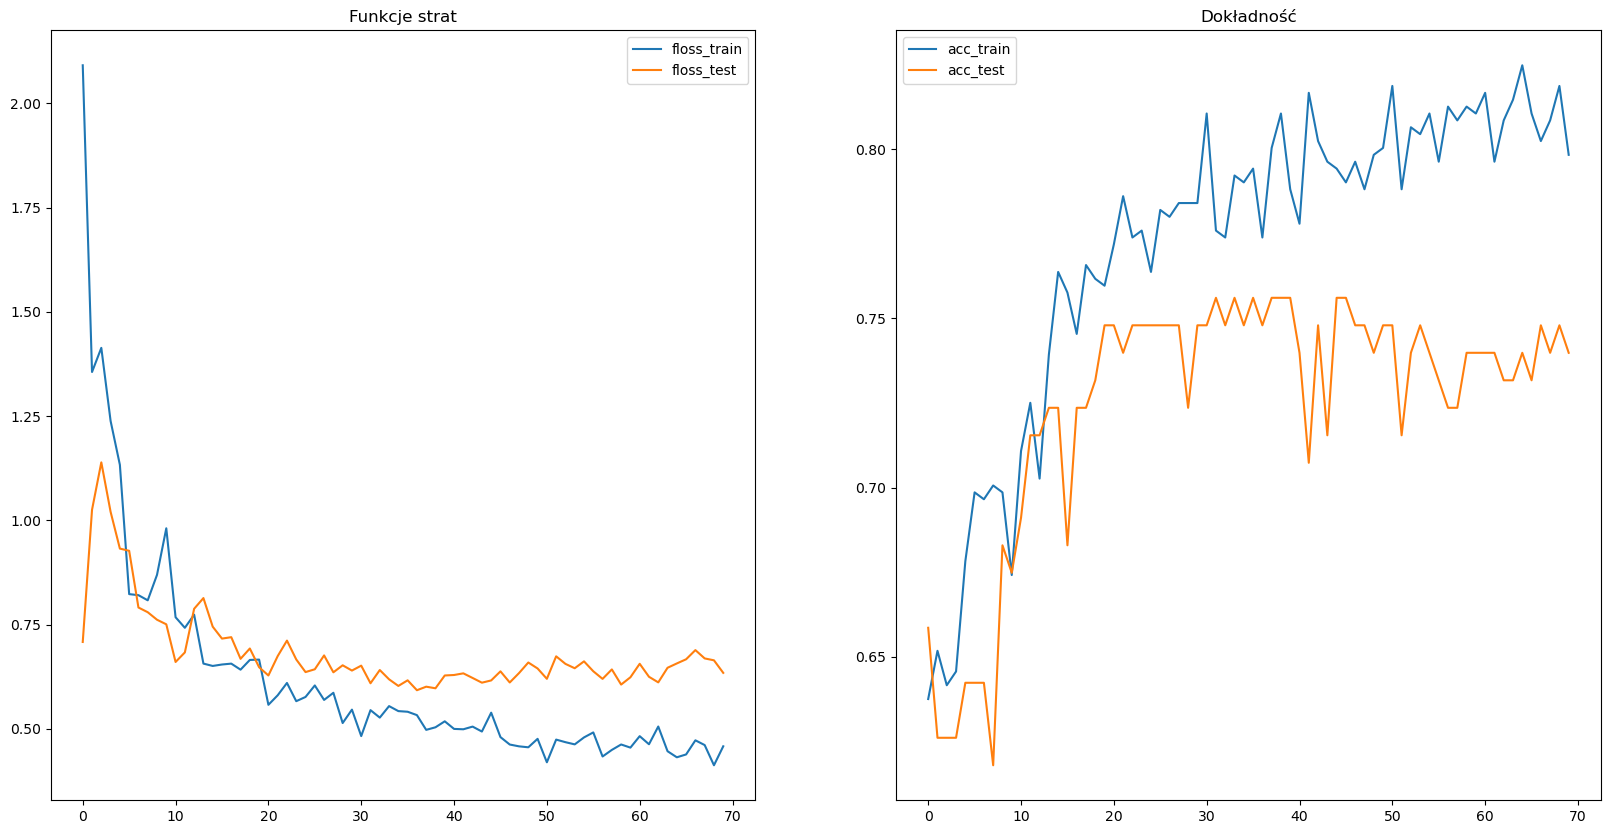

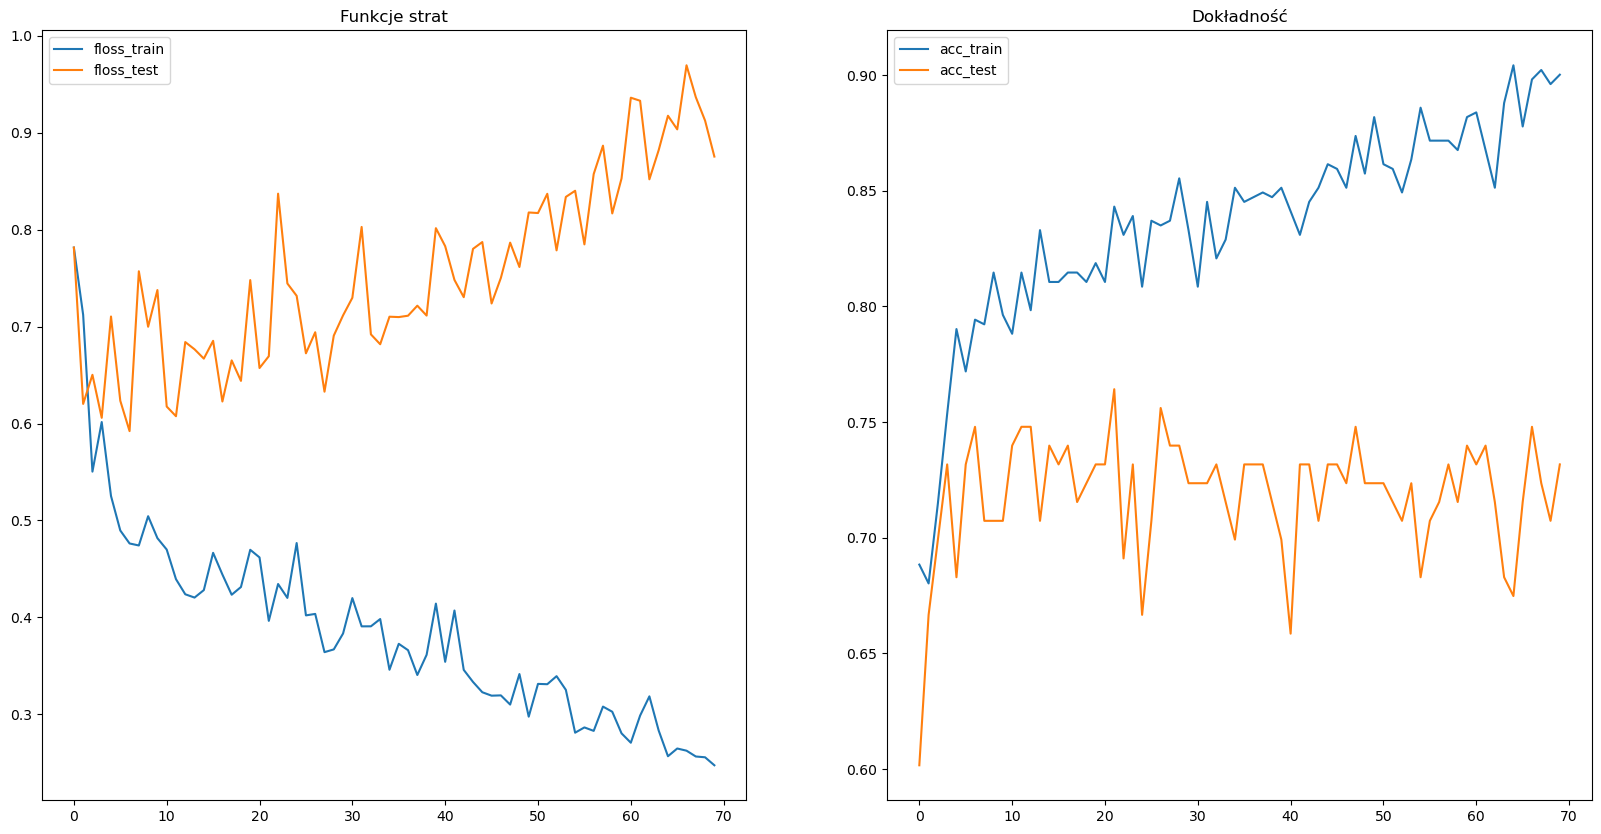

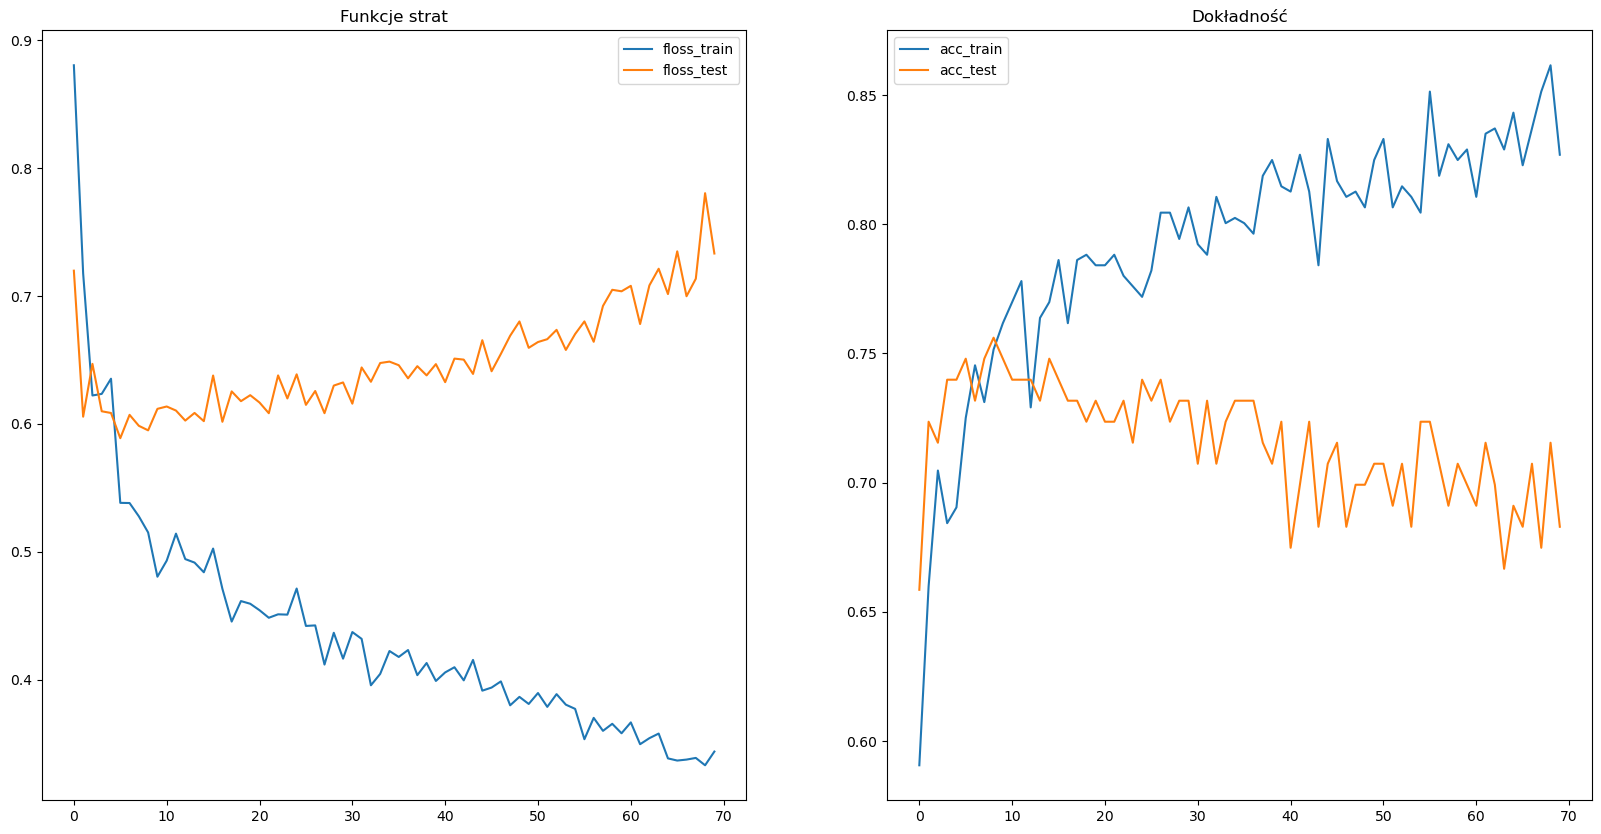

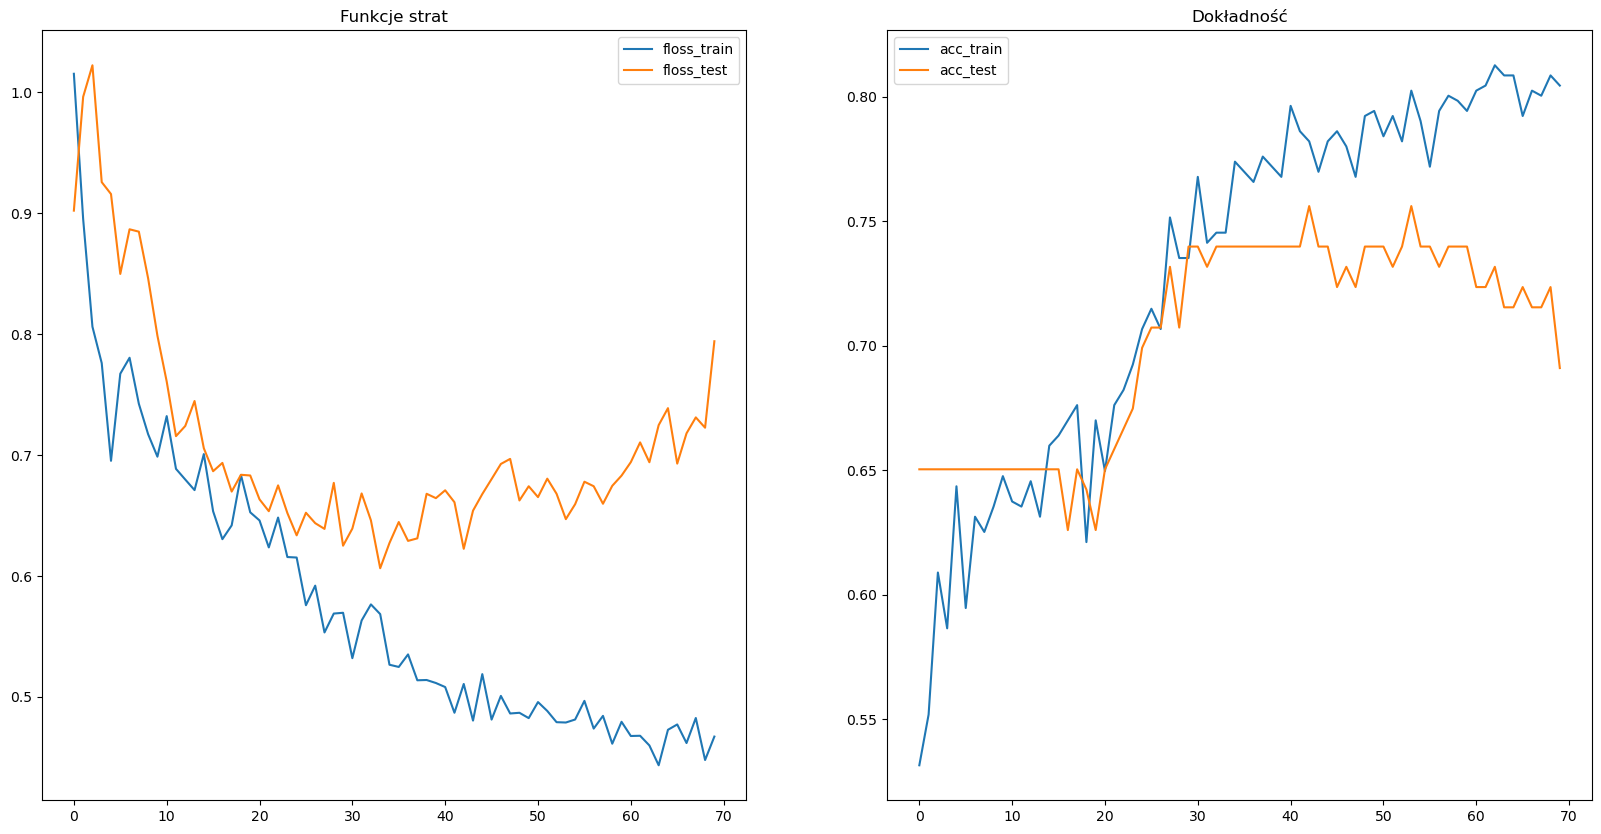

In [2]:
#%% GOOGLE COLLAB
#from google.colab import drive
#drive.mount('/content/drive')
#%% DATA LOADING
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#data = pd.read_csv('/content/drive/MyDrive/Studia/AI/practice_lab_3.csv',";")
data = pd.read_csv('practice_lab_3.csv',";")
originalData = data.copy()
columns = list(data.columns)
mask = data['Gender'].values == 'Female'
data.loc[mask, 'Gender'] = 1
data.loc[~mask, 'Gender'] = 0

cat_feature = pd.Categorical(data.Property_Area)
one_hot = pd.get_dummies(cat_feature)
data = pd.concat([data, one_hot], axis = 1)
data = data.drop(columns = ['Property_Area'])

def qualitative_to_0_1(data, column,value_to_be_1):
    mask = data [column].values == value_to_be_1
    data.loc[mask, column] = 1
    data.loc[~mask, column] = 0
    return data
data=qualitative_to_0_1(data, 'Married', 'Yes')
data=qualitative_to_0_1(data, 'Education', 'Graduate')
data=qualitative_to_0_1(data, 'Self_Employed', 'Yes')
data=qualitative_to_0_1(data, 'Loan_Status', 'Y')

data=data.astype(np.float64)
X=data.drop('Loan_Status', axis=1)
y=data['Loan_Status']
#%%MODELS IMPORTS
from keras.wrappers.scikit_learn import KerasClassifier
from scipy.stats import reciprocal
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, GaussianNoise, LayerNormalization, BatchNormalization
from keras.optimizers import Adam, RMSprop, SGD
from keras.utils import plot_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from keras.regularizers import l2, l1
#%%DATA SPLIT AND MANIPULATION
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
#%%LAB6EX2
num_epochs_for_search=30
num_epochs_for_final_training=70

n_neurons = 64
#do_rate = 0.5
noise = 0.1
learning_rate = 0.001
optimizer = Adam

def build_model(do_rate):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape = (X.shape[1],), activation = 'relu', name='Input'))
    
    model.add(Dense(n_neurons,activation = 'selu',name='Dense1'))
    model.add(Dropout(do_rate,name='Dropout1'))
    model.add(Dense(n_neurons,activation = 'selu',name='Dense2'))
    model.add(Dropout(do_rate,name='Dropout2'))
        
    model.add(Dense(1,activation = 'sigmoid',name='Output'))
    model.compile(optimizer=optimizer(learning_rate), loss='binary_crossentropy', metrics=('accuracy'))
    return model    

#GRID SEARCH -looking for best parameters
keras_classifier=KerasClassifier(build_model)
param_distribs={
    'do_rate': [0,0.2,0.3,0.5],
    }
grid_search_cv=GridSearchCV(keras_classifier, param_distribs)
grid_search_cv.fit(X_train, y_train, epochs=num_epochs_for_search)

best_params=grid_search_cv.best_params_ 

print("Najlepsze parametry: ",best_params)

input("Naciśnij ENTER żeby kontynuować: ")

#CREATION OF BEST NETWORK - based on parameters search
best_model = build_model(**best_params)

best_model.fit(X_train,y_train,batch_size=32,epochs=num_epochs_for_final_training,validation_data=(X_test,y_test),verbose=2)

#CHARTS OF MODEL TRAINING HISTORY
history = best_model.history.history
floss_train = history['loss']
floss_test = history['val_loss']
acc_train = history['accuracy']
acc_test = history['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))

epochs = np.arange(0, num_epochs_for_final_training)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokładność')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()
#%%LAB6EX3
num_epochs_for_search=30
num_epochs_for_final_training=70

n_neurons = 64
do_rate = 0.5
#noise = 0.1
learning_rate = 0.001
optimizer = Adam

def build_model(noise):
    model = Sequential()
    model.add(Dense(n_neurons, input_shape = (X.shape[1],), activation = 'relu', name='Input'))
    
    model.add(Dense(n_neurons,activation = 'selu',name='Dense1'))
    model.add(GaussianNoise(noise,name='GaussianNoise1'))
    model.add(Dense(n_neurons,activation = 'selu',name='Dense2'))
    model.add(GaussianNoise(noise,name='GaussianNoise2'))
        
    model.add(Dense(1,activation = 'sigmoid',name='Output'))
    model.compile(optimizer=optimizer(learning_rate), loss='binary_crossentropy', metrics=('accuracy'))
    return model    

#GRID SEARCH -looking for best parameters
keras_classifier=KerasClassifier(build_model)
param_distribs={
    'noise': [0,0.1,0.2,0.3],
    }
grid_search_cv=GridSearchCV(keras_classifier, param_distribs)
grid_search_cv.fit(X_train, y_train, epochs=num_epochs_for_search)

best_params=grid_search_cv.best_params_ 

print("Najlepsze parametry: ",best_params)

input("Naciśnij ENTER żeby kontynuować: ")

#CREATION OF BEST NETWORK - based on parameters search
best_model = build_model(**best_params)

best_model.fit(X_train,y_train,batch_size=32,epochs=num_epochs_for_final_training,validation_data=(X_test,y_test),verbose=2)

#CHARTS OF MODEL TRAINING HISTORY
history = best_model.history.history
floss_train = history['loss']
floss_test = history['val_loss']
acc_train = history['accuracy']
acc_test = history['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))

epochs = np.arange(0, num_epochs_for_final_training)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokładność')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()
#%%LAB6EX4
num_epochs_for_final_training=70

n_neurons = 64
do_rate = 0.5
noise = 0.1
learning_rate = 0.001
optimizer = Adam

block = [
  Dense,
  LayerNormalization,
  Dropout,
  GaussianNoise]
args = [
  (n_neurons,'selu'),(),(do_rate,),(noise,)]

def build_model(repeat_num):
  model = Sequential()
  model.add(Dense(n_neurons, input_shape = (X.shape[1],), activation = 'relu', name='Input'))

  for i in range(repeat_num):
    for layer,arg in zip(block, args):
      model.add(layer(*arg))
      
  model.add(Dense(1,activation = 'sigmoid',name='Output'))
  model.compile(optimizer=optimizer(learning_rate), loss='binary_crossentropy', metrics=('accuracy', 'Recall','Precision'))
  return model    


for repeats in [1,5]:
  model = build_model(repeats)
  model.summary()
  #input("Naciśnij ENTER żeby kontynuować: ")

  model.fit(X_train,y_train,batch_size=32,epochs=num_epochs_for_final_training,validation_data=(X_test,y_test),verbose=2)

  #CHARTS OF MODEL TRAINING HISTORY
  history = model.history.history
  floss_train = history['loss']
  floss_test = history['val_loss']
  acc_train = history['accuracy']
  acc_test = history['val_accuracy']
  fig,ax = plt.subplots(1,2, figsize=(20,10))

  average_floss_train = np.asarray(floss_train).astype('float32').sum()/num_epochs_for_final_training
  average_floss_test = np.asarray(floss_test).astype('float32').sum()/num_epochs_for_final_training
  average_acc_train = np.asarray(acc_train).astype('float32').sum()/num_epochs_for_final_training
  average_acc_test = np.asarray(acc_test).astype('float32').sum()/num_epochs_for_final_training

  epochs = np.arange(0, num_epochs_for_final_training)
  ax[0].plot(epochs, floss_train, label = 'floss_train')
  ax[0].plot(epochs, floss_test, label = 'floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokładność')
  ax[1].plot(epochs, acc_train, label = 'acc_train')
  ax[1].plot(epochs, acc_test, label = 'acc_test')
  ax[1].legend()

  fig.show()

  print("Średnia strata na zbiorze uczącym: {}".format(average_floss_train))
  print("Średnia strata na zbiorze testowym: {}".format(average_floss_test))
  print("Średnia dokładność na zbiorze uczącym: {}".format(average_acc_train))
  print("Średnia dokładność na zbiorze testowym: {}".format(average_acc_test))